<a href="https://colab.research.google.com/github/Ziedny28/2141720117-mobile-2023/blob/main/week-11/Week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection

Metode yang digunakan:

1. Templaate Matcing
2. Edge Detection
3. Corner Detection
4. Grid Detection
5. Contour detection

In [1]:
# import liblary

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# akses drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Nomor 2

Implementasikan 6 metode template matching pada OpenCV dengan menggunakan
gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

Menggunakan library openCV:
cv.matchTemplate(), dengan parameter:
- image: citra input
- templ: template yang dicari, ukurannya tidak boleh lebih besar dari citra input
- method: metode dari template matching

Jenis metode template matching di OpenCV:
1. TM_SQDIFF
2. TM SQDIFF_NORMED
3. TM_CCORR
4. TM_CCORR NORMED
5. TM_CCOEFF
6. TM_CCOEFF_NORMED

In [3]:
main_image_url = '/content/drive/My Drive/pcvk-resources/cats_and_bunnies.jpg'
template_image_url ='/content/drive/My Drive/pcvk-resources/cat2_templatejpg.jpg'

# Load the main image and the template
main_image = cv.imread(main_image_url)
template = cv.imread(template_image_url)

In [4]:
def getTM(main_image, template, function, title):
    w, h = template.shape[:2][::-1]

    main_cop = main_image.copy()

    # Convert images to grayscale
    main_gray = cv.cvtColor(main_cop, cv.COLOR_BGR2GRAY)
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

    # Match the template using TM_SQDIFF
    result = cv.matchTemplate(main_gray, template_gray, function)

    # Find the location of the best match
    min_val, _, min_loc, max_loc = cv.minMaxLoc(result)

    # Draw a rectangle around the matched area
    if function in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv.rectangle(main_cop, top_left, bottom_right, (0, 0, 255))

    showTM(main_cop, result, title)


def showTM(main_image, result, title):
    # Display the result using plt
    plt.figure(figsize=(12, 3))

    plt.subplot(131), plt.imshow(main_image[:, :, ::-1]), plt.title('Main Image')
    plt.subplot(132), plt.imshow(result, cmap='gray'), plt.title('Matching Result')

    plt.suptitle(title, y=1.02, fontsize=16)

    plt.show()


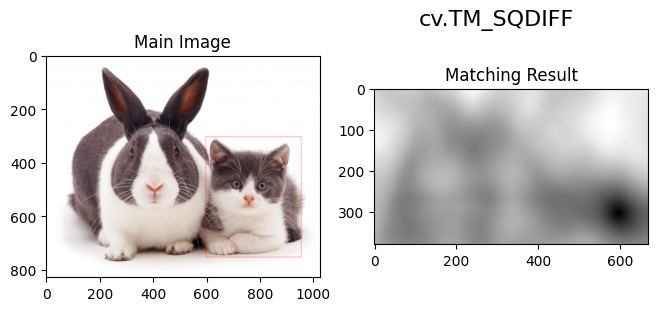

In [5]:
getTM(main_image, template, cv.TM_SQDIFF, "cv.TM_SQDIFF")

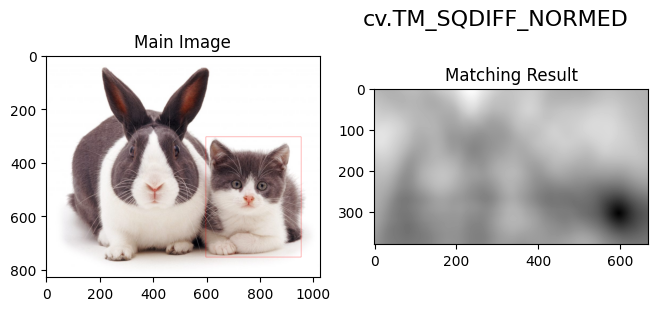

In [6]:
getTM(main_image, template, cv.TM_SQDIFF_NORMED, "cv.TM_SQDIFF_NORMED")

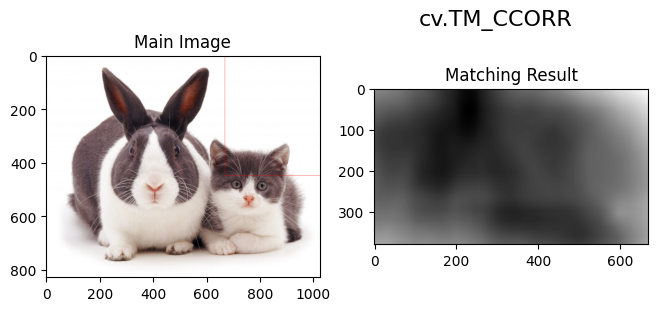

In [7]:
getTM(main_image, template, cv.TM_CCORR, "cv.TM_CCORR")

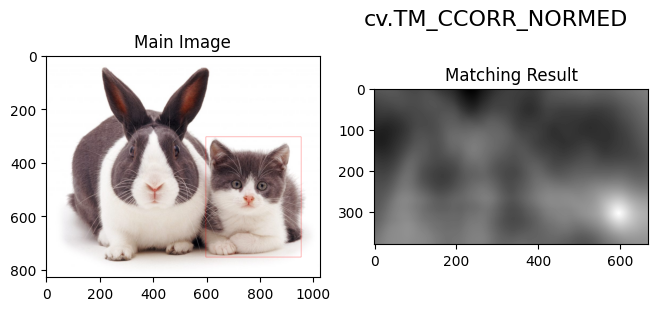

In [8]:
getTM(main_image, template, cv.TM_CCORR_NORMED, "cv.TM_CCORR_NORMED")

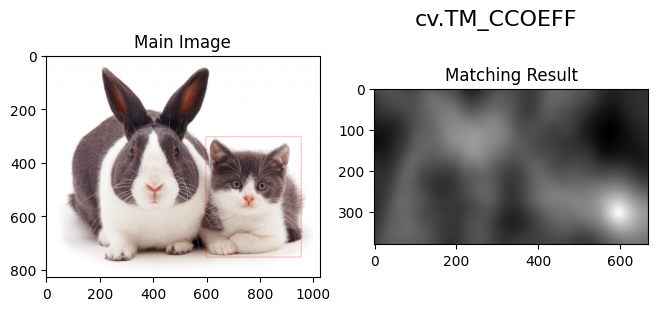

In [9]:
getTM(main_image, template, cv.TM_CCOEFF, "cv.TM_CCOEFF")

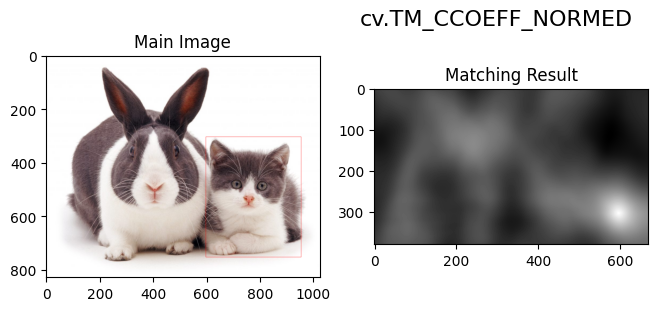

In [10]:
getTM(main_image, template, cv.TM_CCOEFF_NORMED, "cv.TM_CCOEFF_NORMED")

## Nomor 3

Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg

In [11]:
from skimage.feature import match_template

In [12]:
bahrain_url = '/content/drive/My Drive/pcvk-resources/bahrain.jpg'
bahrain_template_url ='/content/drive/My Drive/pcvk-resources/bahrain-template.jpg'

# Load the main image and the template
bahrain_image = cv.imread(bahrain_url)
bahrain_template = cv.imread(bahrain_template_url)

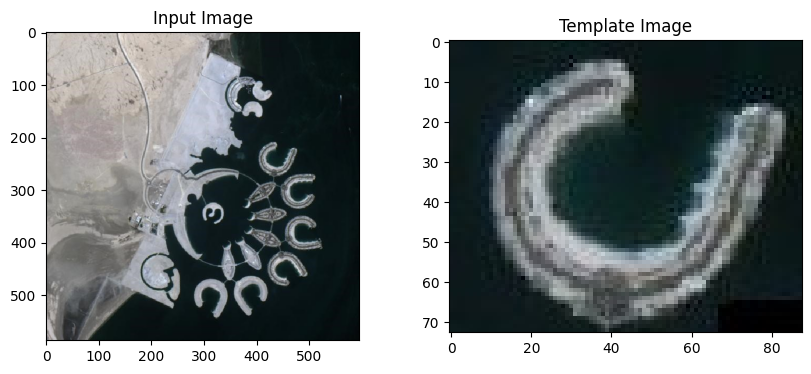

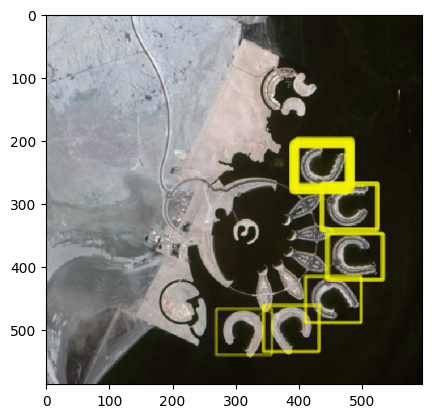

In [13]:
figure, axis_arr = plt.subplots(1, 2, figsize=(10, 4))  # Create 2 plots for input and template images
axis_arr[0].imshow(cv.cvtColor(bahrain_image, cv.COLOR_BGR2RGB)), axis_arr[0].set_title("Input Image")
axis_arr[1].imshow(cv.cvtColor(bahrain_template, cv.COLOR_BGR2RGB)), axis_arr[1].set_title("Template Image")

# Library for matching multiple similar images
from skimage.feature import match_template

# Compute the similarity of the images with the template image
result = match_template(bahrain_image, bahrain_template)

# Set a threshold to determine the matching result
threshold = 0.45  # Set a threshold to determine the matching result
locations = np.where(result >= threshold)

# Plot the matching result
fig, ax = plt.subplots()
ax.imshow(bahrain_image, cmap=plt.cm.gray)
height, width,_ = bahrain_template.shape

# Unpack only the necessary values from locations
for y, x in zip(locations[0], locations[1]):  # Iterate through each found location
    rectangle = plt.Rectangle((x, y), width, height, edgecolor='yellow', facecolor='none', linewidth=0.1)
    ax.add_patch(rectangle)

plt.show()


## Nomor 4

Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan LaplacianEdge Detection pada OpenCV dengan menggunakan gambar car-park.jpg

In [14]:
park_image_url = '/content/drive/My Drive/pcvk-resources/car-park.jpg'
prak_image = cv.imread(park_image_url)
prak_image = cv.cvtColor(prak_image, cv.COLOR_BGR2GRAY)


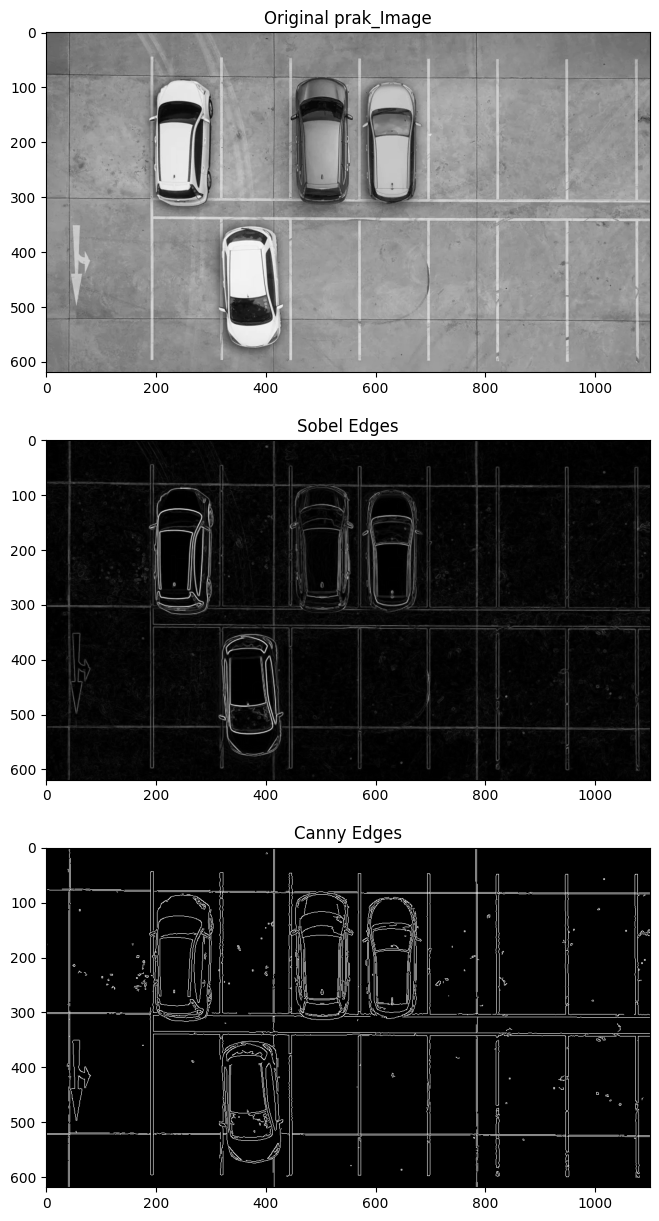

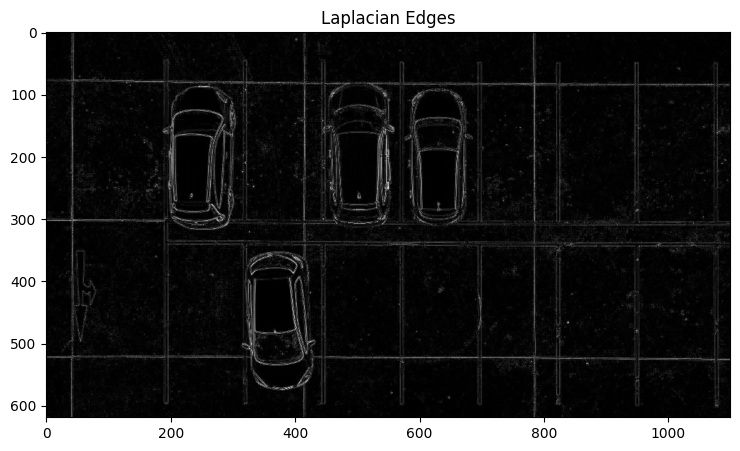

In [25]:
# Sobel Edge Detection
sobel_x = cv.Sobel(prak_image, cv.CV_64F, 1, 0, ksize=3)
sobel_y = cv.Sobel(prak_image, cv.CV_64F, 0, 1, ksize=3)
sobel_edges = np.sqrt(sobel_x**2 + sobel_y**2)

# Canny Edge Detection
canny_edges = cv.Canny(prak_image, 100, 200)

# Apply Laplacian Edge Detection
laplacian = cv.Laplacian(prak_image, cv.CV_64F)

# Convert to absolute values
laplacian_abs = cv.convertScaleAbs(laplacian)

# Display the results in separate rows
plt.figure(figsize=(30, 15))

# Original Image
plt.subplot(3, 1, 1)
plt.imshow(prak_image, cmap='gray')
plt.title('Original prak_Image')

# Sobel Edges
plt.subplot(3, 1, 2)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edges')

# Canny Edges
plt.subplot(3, 1, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edges')

plt.show()

# Additional row for Laplacian Edges
plt.figure(figsize=(15, 5))

# Laplacian Edges
plt.subplot(1, 1, 1)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Edges')

plt.show()


## Nomor 5

Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection

In [16]:
chess_image_url = '/content/drive/My Drive/pcvk-resources/chess-board.jpg'
chess_image = cv.imread(chess_image_url)
gray_chess_image = cv.cvtColor(chess_image, cv.COLOR_BGR2GRAY)

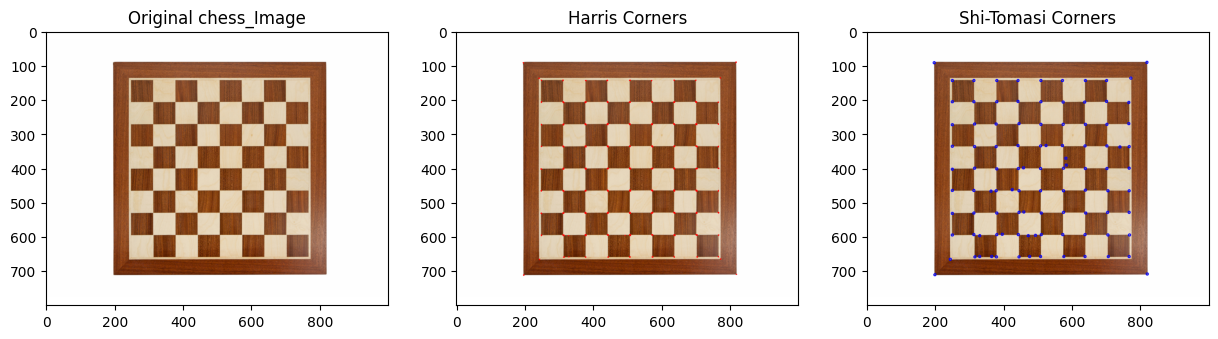

In [17]:
# Harris Corner Detection
harris_corners = cv.cornerHarris(gray_chess_image, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)

# Shi-Tomasi Detection
corners = cv.goodFeaturesToTrack(gray_chess_image, maxCorners=25, qualityLevel=0.01, minDistance=10)
corners = np.int0(corners)

# Draw Harris corners on the chess_image
chess_image_harris = chess_image.copy()
chess_image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]

# Draw Shi-Tomasi corners on the chess_image
chess_image_shi_tomasi = chess_image.copy()
chess_image_shi_tomasi = cv.cvtColor(chess_image_shi_tomasi, cv.COLOR_BGR2RGB)

corners = cv.goodFeaturesToTrack(gray_chess_image, 100, 0.01, 10)
corners = np.int0(corners)
for i in corners:
    x, y = i.ravel()
    cv.circle(chess_image_shi_tomasi, (x, y), 3, (0, 0, 255), 2)  # Change color to blue

# Display the results
plt.figure(figsize=(15, 6))

plt.subplot(131), plt.imshow(cv.cvtColor(chess_image, cv.COLOR_BGR2RGB)), plt.title('Original chess_Image')
plt.subplot(132), plt.imshow(cv.cvtColor(chess_image_harris, cv.COLOR_BGR2RGB), cmap='gray'), plt.title('Harris Corners')
plt.subplot(133), plt.imshow(chess_image_shi_tomasi, cmap='gray'), plt.title('Shi-Tomasi Corners')

plt.show()

## Nomor 6

Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori,

number of Hough lines: 33
Number of filtered lines: 20


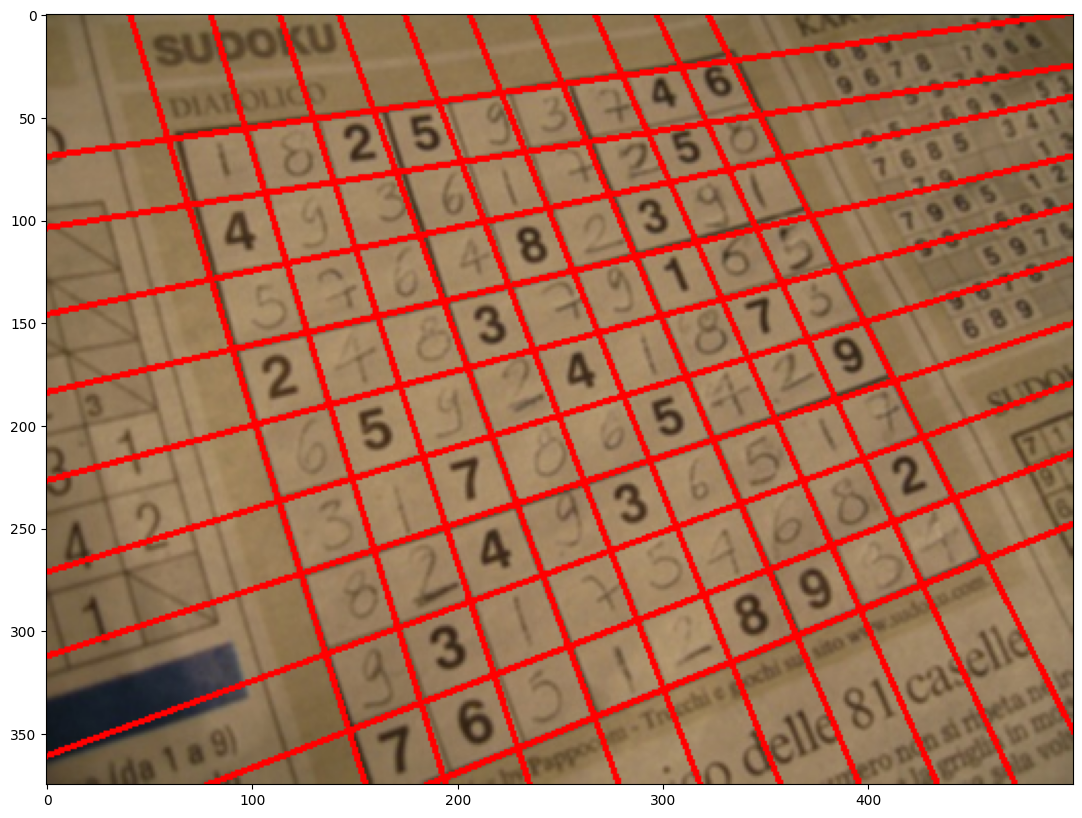

In [20]:
sudoku_img_url = '/content/drive/My Drive/pcvk-resources/sudoku.jpg'

input_image = cv.imread(sudoku_img_url)
image_gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

edges = cv.Canny(image_gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations=1)

kernel = np.ones((5, 5), np.uint8)
edges = cv.erode(edges, kernel, iterations=1)

lines = cv.HoughLines(edges, 1, np.pi / 180, 150)

if not lines.any():
    print('No lines were found')
    exit()

rho_threshold = 15
theta_threshold = 0.1

similar_lines = {i: [] for i in range(len(lines))}
for i in range(len(lines)):
    for j in range(len(lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

indices = [i for i in range(len(lines))]
indices.sort(key=lambda x: len(similar_lines[x]))

line_flags = len(lines) * [True]
for i in range(len(lines) - 1):
    if not line_flags[indices[i]]:
        continue
    for j in range(i + 1, len(lines)):
        if not line_flags[indices[j]]:
            continue
        rho_i, theta_i = lines[indices[i]][0]
        rho_j, theta_j = lines[indices[j]][0]
        if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
            line_flags[indices[j]] = False
print('number of Hough lines:', len(lines))

filtered_lines = []

for i in range(len(lines)):
    if line_flags[i]:
        filtered_lines.append(lines[i])

print('Number of filtered lines:', len(filtered_lines))

for line in filtered_lines:
    rho, theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    x1 = int(x0 + 1000 * (-b))
    y1 = int(y0 + 1000 * (a))
    x2 = int(x0 - 1000 * (-b))
    y2 = int(y0 - 1000 * (a))

    cv.line(input_image, (x1, y1), (x2, y2), (0, 0, 255), 2)

plt.figure(figsize=(20, 10))
plt.imshow(cv.cvtColor(input_image, cv.COLOR_BGR2RGB))
plt.show()


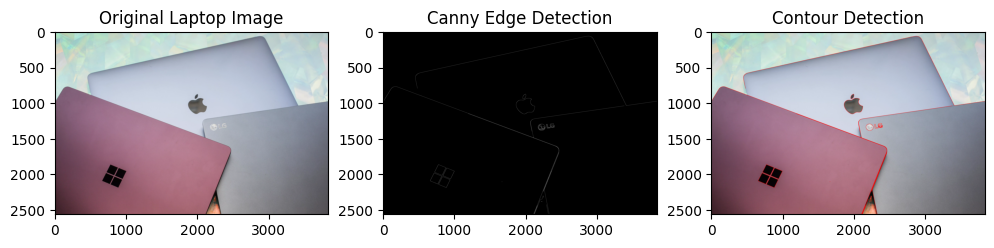

In [22]:
# Load the image
laptop_image_path = '/content/drive/My Drive/pcvk-resources/laptop.jpg'
laptop_image = cv.imread(laptop_image_path)

# Convert the image to grayscale
gray_image = cv.cvtColor(laptop_image, cv.COLOR_BGR2GRAY)

# Apply GaussianBlur to reduce noise and help contour detection
blurred_image = cv.GaussianBlur(gray_image, (5, 5), 0)

# Apply Canny edge detection
edges = cv.Canny(blurred_image, 50, 150)

# Find contours in the edged image
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Draw contours on the original image
contour_image = laptop_image.copy()
cv.drawContours(contour_image, contours, -1, (0, 0, 255), 2)

# Display the results using matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(131), plt.imshow(cv.cvtColor(laptop_image, cv.COLOR_BGR2RGB)), plt.title('Original Laptop Image')
plt.subplot(132), plt.imshow(edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.subplot(133), plt.imshow(cv.cvtColor(contour_image, cv.COLOR_BGR2RGB)), plt.title('Contour Detection')

plt.show()